In [113]:
import numpy as np

In [114]:
import matplotlib.pyplot as plt

In [115]:
import seaborn as sns

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_curve, auc

In [118]:
from tensorflow.keras.models import Sequential

In [119]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [120]:
from tensorflow.keras.callbacks import EarlyStopping

In [121]:
import tensorflow as tf

In [122]:
#style the visualization
sns.set(style="whitegrid")

In [123]:
#set random seed for reproductivity
np.random.seed(42)
tf.random.set_seed(42)


In [124]:
#set up@set up paths to dataset
train_data_dir = r'C:\Users\barra\Desktop\brain-tumor-prediction\images'
test_data_dir = r'C:\Users\barra\Desktop\brain-tumor-prediction\images'

In [125]:
#Data augmenatation and normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) #added valitation split


In [126]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Resize to match input shape
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 3681 images belonging to 2 classes.


In [127]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Resize to match input shape
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 919 images belonging to 2 classes.


In [128]:
#visualize sample images from the dataset
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

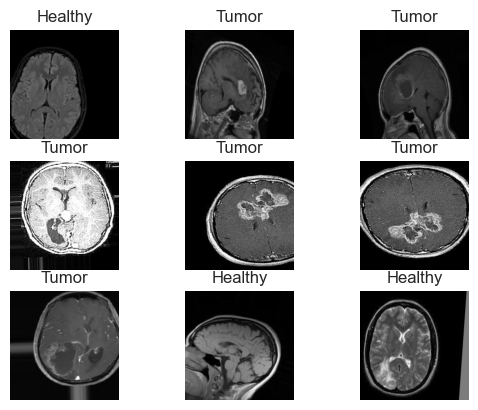

In [129]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title('Tumor'if sample_labels[i] == 1 else'Healthy')
    plt.axis('off')
    
plt.show()

In [130]:
#Building the CNN modl
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Input shape must match your image dimensions
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])


In [131]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
#define early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)

In [133]:
#train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - accuracy: 0.5482 - loss: 0.7228 - val_accuracy: 0.5626 - val_loss: 0.6808
Epoch 2/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.6063 - loss: 0.6640 - val_accuracy: 0.6159 - val_loss: 0.6660
Epoch 3/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.6785 - loss: 0.5951 - val_accuracy: 0.6736 - val_loss: 0.6125
Epoch 4/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.6877 - loss: 0.5938 - val_accuracy: 0.6366 - val_loss: 0.6369
Epoch 5/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.7340 - loss: 0.5353 - val_accuracy: 0.6779 - val_loss: 0.6126
Epoch 6/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 418s 3s/step - accuracy: 0.7445 - loss: 0.5108 - val_accuracy: 0.6877 - val_loss: 0.5918
Epoch 7/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.7440 - loss: 0.4965 - val_accuracy: 0.6921 - val_loss: 0.5911
Epoch 8/25
116/116 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.7584 - loss: 0.4833 - val_accu

In [134]:
# Function to plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

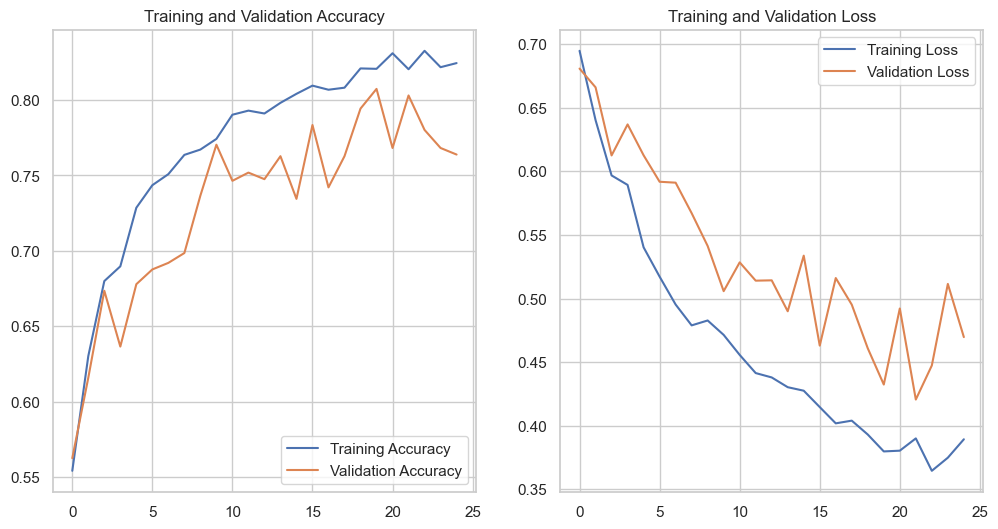

In [135]:
# Plot the accuracy and loss
plot_training_history(history)

In [137]:
# Save the trained model
model.save('brain_tumor_model.h5')